Prediction using Unsupervised Machine Language 

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 

In [ ]:
# reading the iris dataset


In [ ]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 6)

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder= preprocessing.LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [ ]:
from sklearn.cluster import KMeans
ssq=[]  # sum of squared distance between members of clusters and its centroid.

for k in range(1,11):
  my_model = KMeans(n_clusters=k, random_state= 123) #KMeans_model is object of KMeans
  result = my_model.fit(df)
  ssq.append(my_model.inertia_)
# inertia means within sum of square. minimize inertia gives optimal number of clusters

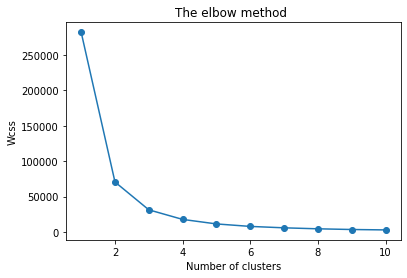

In [ ]:
plt.plot(range(1,11),ssq,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss') #within cluster sum of square
plt.title('The elbow method ')
plt.show()

In [ ]:
from pandas._libs.lib import no_default
# applying kmeans to dataset
kmeans= KMeans(n_clusters= 3,init= 'k-means++', max_iter=300, n_init=10, random_state=0)
x= df.iloc[:,[0,1,2,3]].values
y_kmeans = kmeans.fit_predict(x)

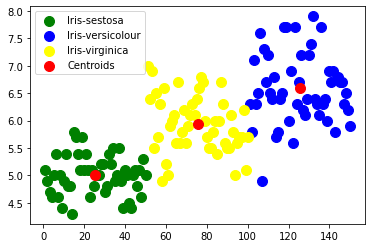

In [ ]:
# vizsualising the cluster - on the first two columns
plt.scatter(x[y_kmeans ==0,0], x[y_kmeans ==0,1], s=100,c='green',label='Iris-sestosa')
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans ==1,1],s=100,c='blue',label ='Iris-versicolour')
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans ==2,1],s=100,c='yellow',label='Iris-virginica')

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='red',label='Centroids')
plt.legend()